In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [3]:
# Step 2: Load dataset from your uploaded file
df = pd.read_csv("/content/heart_cleveland_upload.csv")

# Show first 5 rows
print(df.head())

# Show dataset shape (rows, columns)
print("Dataset Shape:", df.shape)

# Show basic info about columns
print(df.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
Dataset Shape: (297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    i

In [4]:
# Step 3: Data Understanding & Preprocessing

# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())

# Show basic statistics
print("\nDataset Description:\n", df.describe())

# Define features (X) and target (y)
X = df.drop("condition", axis=1)  # All columns except 'condition'
y = df["condition"]               # Target column

# Split dataset into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Missing values in dataset:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Dataset Description:
               age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000 

In [5]:
# Step 4: Train Models

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Accuracy
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Logistic Regression Accuracy: 0.7888888888888889
Random Forest Accuracy: 0.8


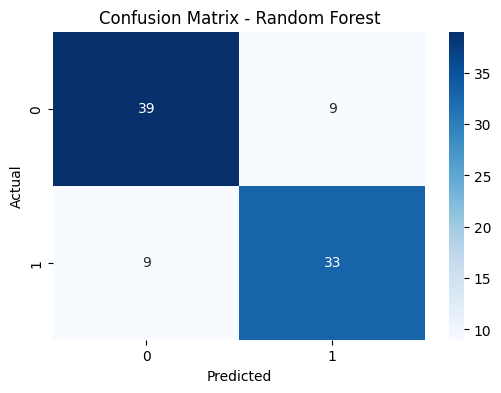

Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        48
           1       0.79      0.79      0.79        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



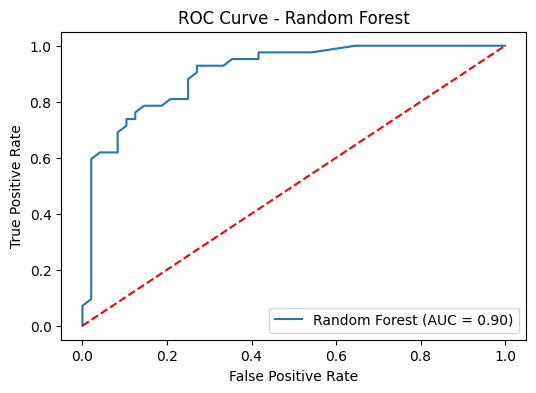

In [6]:

# Step 5: Model Evaluation

# Import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report - Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

# ROC Curve for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:,1]  # Probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Random Forest (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Step 8: Graphical User Interface (GUI) for Heart Disease Prediction
import gradio as gr
import numpy as np

def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg,
                          thalach, exang, oldpeak, slope, ca, thal):
    # Convert user input into numpy array
    user_input = np.array([age, sex, cp, trestbps, chol, fbs, restecg,
                           thalach, exang, oldpeak, slope, ca, thal], dtype=float).reshape(1, -1)

    # Scale input with the same scaler used during training
    user_input_scaled = scaler.transform(user_input)

    # Predict using Random Forest only
    prob = rf.predict_proba(user_input_scaled)[:, 1][0]  # probability of heart disease

    # Return result with probability
    if prob > 0.5:
        return f"❤️ Heart Disease Detected (Risk: {prob*100:.2f}%)"
    else:
        return f"✅ No Heart Disease (Risk: {prob*100:.2f}%)"


# Define GUI inputs (based on dataset)
inputs = [
    gr.Number(label="Age"),
    gr.Radio([0, 1], label="Sex (0 = Female, 1 = Male)"),
    gr.Dropdown([0, 1, 2, 3], label="Chest Pain Type (cp: 0-3)"),
    gr.Number(label="Resting BP (trestbps)"),
    gr.Number(label="Cholesterol (chol)"),
    gr.Radio([0, 1], label="Fasting Blood Sugar (fbs)"),
    gr.Dropdown([0, 1, 2], label="Resting ECG (restecg)"),
    gr.Number(label="Max Heart Rate (thalach)"),
    gr.Radio([0, 1], label="Exercise Induced Angina (exang)"),
    gr.Number(label="Oldpeak"),
    gr.Dropdown([0, 1, 2], label="Slope"),
    gr.Dropdown([0, 1, 2, 3], label="Number of Major Vessels (ca)"),
    gr.Dropdown([0, 1, 2], label="Thalassemia (thal)")
]

# Create and launch Gradio app
interface = gr.Interface(
    fn=predict_heart_disease,
    inputs=inputs,
    outputs="text",
    title="Heart Disease Prediction System",
    description="Enter patient health details below to predict the risk of heart disease (with probability score)."
)

interface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://354d7c0f4aadcbf81f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
# Install XGBoost (if not already installed)
!pip install xgboost


In [8]:
# Import XGBoost classifier
from xgboost import XGBClassifier


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:40:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8


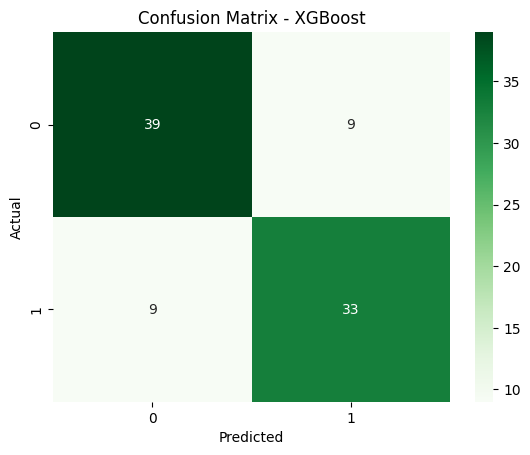

Classification Report - XGBoost:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        48
           1       0.79      0.79      0.79        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



In [9]:
# Step 6b: Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions on test set
y_pred_xgb = xgb.predict(X_test)

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report - XGBoost:\n")
print(classification_report(y_test, y_pred_xgb))


SVM Accuracy: 0.8


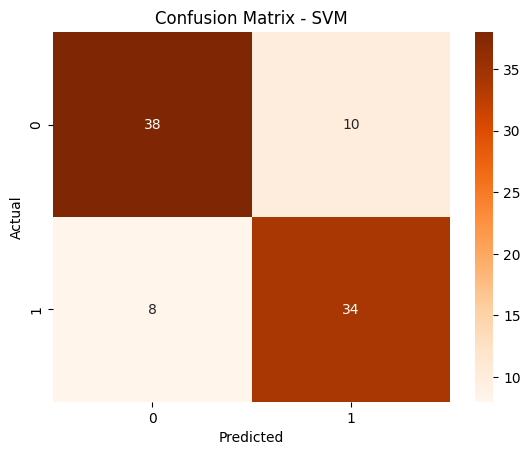

Classification Report - SVM:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        48
           1       0.77      0.81      0.79        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



In [10]:
# Step 7a: Import SVM
from sklearn.svm import SVC

# Train SVM model (with RBF kernel)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report - SVM:\n")
print(classification_report(y_test, y_pred_svm))
